In [1]:
import patchify
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loc_P04 = '/home/saumya/Documents/Rajesh_sir_Dip/Schlieren-Data/P04/'
# loc_P04 = '/home/saumya/Documents/Schileren_wavelet/Schlieren-Data/P04/'

In [3]:
data = np.load(loc_P04+'P04.npy')

In [4]:
cropped_data = []
for k in data:
    cropped_data.append(k[270:950, 290:720])

In [5]:
cropped_data[0].shape

(680, 430)

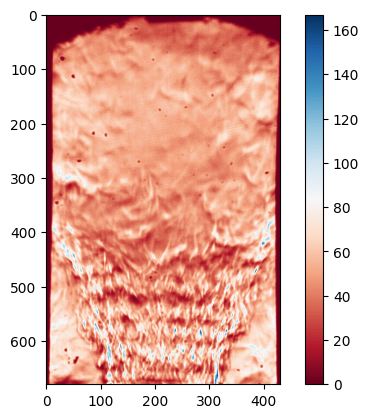

In [6]:
peg = plt.imshow(cropped_data[99], cmap='RdBu')
plt.colorbar(peg)

In [7]:
cropped_data[0].shape

(680, 430)

In [8]:
patches = []
for i in range(data.shape[0]):
    patches.append(patchify.patchify(cropped_data[0], (9, 9), 9))
patches = np.array(patches)

In [9]:
patches.shape

(806, 75, 47, 9, 9)

In [10]:
%who

cropped_data	 data	 i	 k	 loc_P04	 np	 patches	 patchify	 peg	 
plt	 


In [11]:
mean = np.zeros(patches.shape[:3])
median = np.zeros(patches.shape[:3])
# mode = np.zeros(patches.shape[:3])
for k in range(data.shape[0]):
#     # exec(f'mean_{k} = []')
    for i in range(patches.shape[1]):
        for j in range(patches.shape[2]):
            mean[k][i][j] = np.mean(patches[k][i][j])
            median[k][i][j] = np.median(patches[k][i][j])
            # mode[k][i][j] = np.mode(patches[k][i][j])

In [12]:
mean.shape

(806, 75, 47)

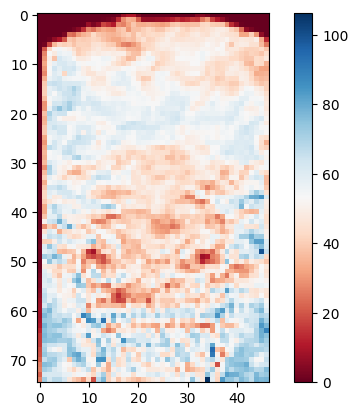

In [13]:
neg = plt.imshow(np.array(mean[100]), cmap='RdBu')
plt.colorbar(neg)

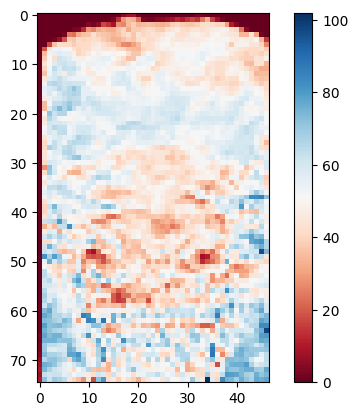

In [14]:
neg = plt.imshow(np.array(median[100]), cmap='RdBu')
plt.colorbar(neg)

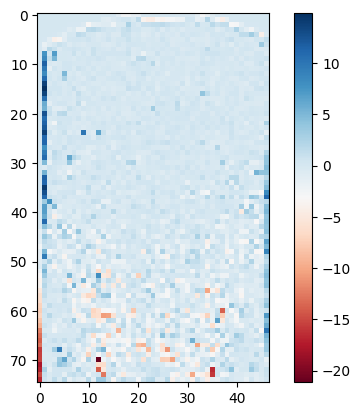

In [15]:
neg = plt.imshow(np.array(median[100]-mean[100]), cmap='RdBu')
plt.colorbar(neg)

In [16]:
from scipy.fft import fft, fftfreq
fft_sig = np.zeros_like(mean).astype(np.complex64)
# fft_freq = np.zeros_like(mean).astype(np.complex64)
for i in range(mean.shape[1]):
    for j in range(mean.shape[2]):
            fft_sig[:, i, j] = fft(mean[:, i, j])
            # fft_freq[:, i, j] = fftfreq(mean[:, i, j])


In [17]:
fft_sig.shape

(806, 75, 47)

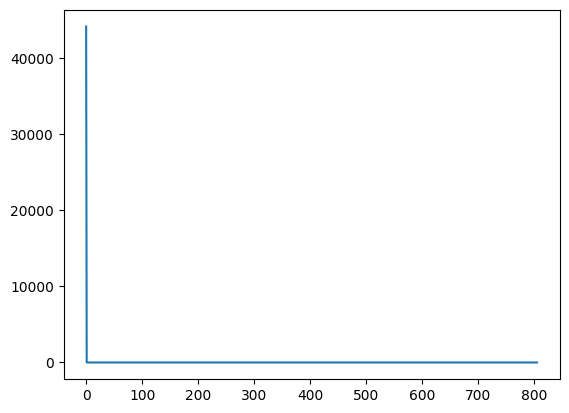

In [26]:
plt.plot(abs(fft_sig[:,55,33]))

In [20]:
fft_sig[0].shape

(75, 47)